In [1]:
from  utility import *
import numpy as np
import matplotlib.pyplot as plt

To study the response of the metamodels to a hypersurface with steep gradients localized in a region in the interior of the input domain, consider the function $f:[0,1)$ x $[0,1)$->



In [2]:
def F(X):
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = X[:,2]
    r = np.sqrt(x1**x1+x2*x2+x3*x3)
    return np.exp(-r)
    

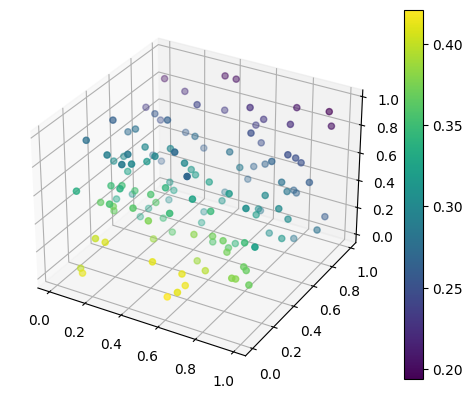

In [3]:
X,y = GenerateData((128,3),F)
VisualizeData3D(X,y)

In [4]:
X_test,y_test = GenerateData((1000,3),F)

In [5]:
betas = [1,2,3,4,5,6,7,8]
nCentres = [80,85,90,95]
min_loss,optimal_beta,optimal_nCentres = GridSearch(betas,nCentres,X,y,X_test,y_test)
print(f"minimum loss: {min_loss:.6f}")
print(f"optimal beta: {optimal_beta}")
print(f"optimal number of Centres: {optimal_nCentres}")

minimum loss: 0.001203
optimal beta: 4
optimal number of Centres: 80


In [6]:
model = RBFNN(nCentres=optimal_nCentres)
model.reset_parameter(X,y,beta=optimal_beta)
pred = model.forward(X)
print(f"RBF Centres shape:\n {model.RBF.centres.shape}")
print(f"Weight parameter shape: \n {model.Linear.weights.shape}")

RBF Centres shape:
 (80, 3)
Weight parameter shape: 
 (80,)


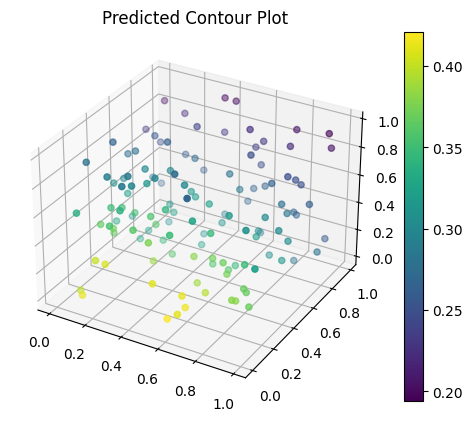

In [7]:
VisualizeData3D(X,pred,"Predicted Contour Plot")

In [8]:
print(f"loss on train data: {MSELoss(pred,y):.5f}")
print(f"loss on test data: {min_loss:.5f}")

loss on train data: 0.00022
loss on test data: 0.00120


In [9]:
train_size = [32,64,128,256]
betas = np.arange(0.25,2,0.25)
nCentres = [8,16,24,32,40,48,56,64,72,80,88]
test_loss = []
for sz in train_size:
    X,y = GenerateData((sz,3),F)
    (min_loss,optimal_beta,optimal_nCentres) = GridSearch(betas,nCentres,X,y,X_test,y_test)
    model = RBFNN(nCentres=optimal_nCentres)
    model.reset_parameter(X,y,beta=optimal_beta)
    pred = model.forward(X)
    test_loss.append(min_loss)
    print(f"train size: {sz}")
    print(f"optimal beta: {optimal_beta}, optimal number of centre: {optimal_nCentres}")
    print(f"loss on train data: {MSELoss(pred,y):.5f}")
    print(f"loss on test data: {min_loss:.5f}")
    print("-----------------------------------------------")
    
    

train size: 32
optimal beta: 1.5, optimal number of centre: 32
loss on train data: 0.00000
loss on test data: 0.00254
-----------------------------------------------
train size: 64
optimal beta: 0.75, optimal number of centre: 40
loss on train data: 0.00036
loss on test data: 0.00108
-----------------------------------------------
train size: 128
optimal beta: 1.0, optimal number of centre: 56
loss on train data: 0.00030
loss on test data: 0.00081
-----------------------------------------------
train size: 256
optimal beta: 1.75, optimal number of centre: 80
loss on train data: 0.00020
loss on test data: 0.00049
-----------------------------------------------


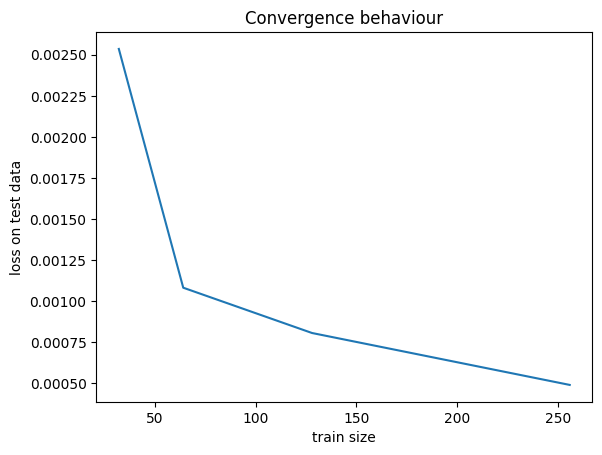

In [10]:
plt.plot(train_size,test_loss)
plt.title("Convergence behaviour")
plt.xlabel("train size")
plt.ylabel("loss on test data")
plt.show()